## DA_Fall21_HW_2 
### Due Date: 11/11 before Mid-night
### Linear Regression and Logistisc Regression 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Part 1 of this HW is on building a Linear Regression model using housing data and a Logistic Regression model.

### Part 1: Build a Linear Regression model to predict house price

#### First load the data set

In [161]:
housing = pd.read_csv("USA_housing.csv")
housing.head()

,Income,HouseAge,NumberOfRooms,AreaNumberOfBedrooms,Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


***Follow the standard way of building a model and in particular,***
1. Use Scatter plots and correlation to identify the most important variable that can explain the house price.
2. Build a one-factor Linear Regression model using that variable
3. Print out the model performance metrics (MSE, R-square).
4. Plot your best-fitted line on top of the data.
5. Perform a 10-fold cross validation and determine if your model pass the cross-validation.
6. Add one addition variable to build a 2-factors model. Explain your reason why you choose that variable.

***Part 1: Type your code and answers here***

In [162]:
Xarray = housing['Income'].values
type(Xarray)

numpy.ndarray

In [163]:
Yarray = housing['Price'].values
type(Yarray)

numpy.ndarray

In [164]:
Xarray

array([79545.45857, 79248.64245, 61287.06718, ..., 63390.68689,
       68001.33124, 65510.5818 ])

In [165]:
Yarray

array([1059033.558, 1505890.915, 1058987.988, ..., 1030729.583,
       1198656.872, 1298950.48 ])

In [166]:
X = Xarray.reshape(-1,2)
X = Xarray.reshape(-1,1)
print(X.shape)
X

(5000, 1)


array([[79545.45857],
       [79248.64245],
       [61287.06718],
       ...,
       [63390.68689],
       [68001.33124],
       [65510.5818 ]])

In [167]:
Y = Yarray.reshape(-1,1)
print(Y.shape)
Y

(5000, 1)


array([[1059033.558],
       [1505890.915],
       [1058987.988],
       ...,
       [1030729.583],
       [1198656.872],
       [1298950.48 ]])

In [168]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X, Y)

LinearRegression()

In [169]:
print(model1.intercept_)
print(model1.coef_)

[-221579.47822252]
[[21.19548317]]


In [170]:
Y_pred = model1.predict(X)

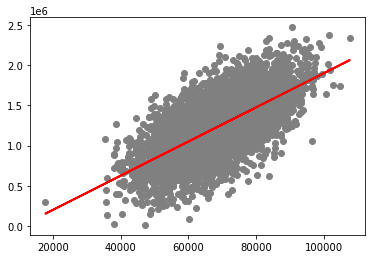

In [171]:
plt.scatter(X, Y,  color='gray')
plt.plot(X, Y_pred, color='red', linewidth=2)
plt.show()

In [183]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [184]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(0.8 * housing.shape[0])
print(0.2 * housing.shape[0])

(4000, 1)
(1000, 1)
(4000, 1)
(1000, 1)
4000.0
1000.0


In [185]:
model2 = LinearRegression()
model2.fit(X_train, Y_train)
print(model2.intercept_)
print(model2.coef_)

[-224617.80110797]
[[21.24368249]]


In [186]:
print(model1.intercept_)
print(model1.coef_)

[-221579.47822252]
[[21.19548317]]


In [187]:
Y_pred = model2.predict(X_test)

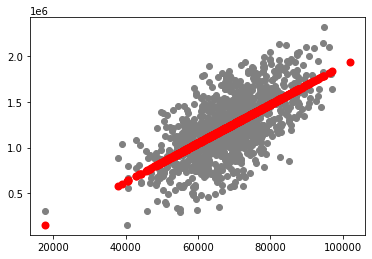

In [188]:
plt.scatter(X_test, Y_test,  color='gray')
plt.scatter(X_test, Y_pred, color='red', linewidth=2)
plt.show()

In [190]:
from sklearn import metrics

In [192]:
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

Mean Squared Error: 74084394120.77266
R-squared: 0.4006059806785851


In [193]:
import random
for i in range(10):
    print(random.randint(1, 1000))

48
567
415
494
837
328
643
787
169
671


In [202]:
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    print('Trial {}, R-squared: {},  Slope: {}, Intercept: {},  '.format(i, metrics.r2_score(Y_test, Y_pred), \
                                                                      model.coef_, model.intercept_))

Trial 0, R-squared: 0.3918058204392385,  Slope: [[21.54733002]], Intercept: [-245983.00244447],  
Trial 1, R-squared: 0.4021030821707833,  Slope: [[21.19821916]], Intercept: [-218833.84767346],  
Trial 2, R-squared: 0.40684382501385075,  Slope: [[21.16409341]], Intercept: [-219106.82968635],  
Trial 3, R-squared: 0.40193070236936423,  Slope: [[21.19343725]], Intercept: [-220310.195319],  
Trial 4, R-squared: 0.4055827146594927,  Slope: [[21.49256994]], Intercept: [-248702.79316251],  
Trial 5, R-squared: 0.3864240479961242,  Slope: [[21.32829662]], Intercept: [-229976.94397311],  
Trial 6, R-squared: 0.40869288220544575,  Slope: [[20.92158051]], Intercept: [-203949.8044185],  
Trial 7, R-squared: 0.3872823560712324,  Slope: [[21.40283675]], Intercept: [-236703.19791513],  
Trial 8, R-squared: 0.43403288695921804,  Slope: [[20.80322704]], Intercept: [-193573.86309061],  
Trial 9, R-squared: 0.4219184423864465,  Slope: [[20.99194425]], Intercept: [-205923.63810606],  


In [203]:
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    
rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf

,trial,Rsquare
0,0,0.349339
1,1,0.420261
2,2,0.402311
3,3,0.420006
4,4,0.412968
5,5,0.413667
6,6,0.380518
7,7,0.397662
8,8,0.383366
9,9,0.394165


<AxesSubplot:xlabel='trial'>

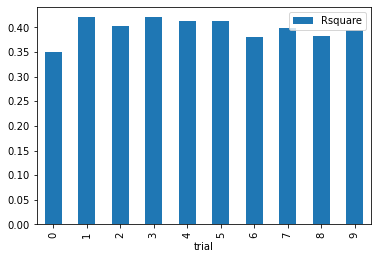

In [204]:
rdf.plot.bar(x='trial', y='Rsquare')

In [205]:
print(rdf['Rsquare'].mean())

0.39742636904196005


#### The 10-fold cross validation passes because the R-square values are all in the same range.

#### I choose to add NumberOfRooms because it seems like it would also play a part in describing the Price of a house.

In [206]:
X = housing[['Price','Income']].values.reshape(-1, 2)
Y = housing['NumberOfRooms'].values.reshape(-1, 1)
 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(4000, 2) (1000, 2)
(4000, 1) (1000, 1)


In [207]:
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(model.coef_)
print(model.intercept_)

[[ 1.64476126e-06 -3.67874807e-05]]
[7.48349232]


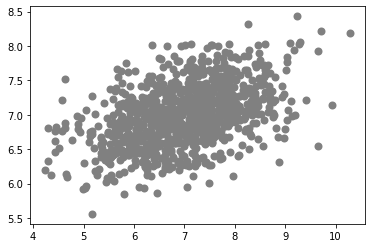

In [212]:
plt.scatter(Y_test, Y_pred, color='grey', linewidth=2)
plt.show()

In [209]:
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

R-squared: 0.2132064753448052


Trial 0, R-squared: 0.19280798073726135,  Slope: [[ 1.63909638e-06 -3.50743266e-05]], Intercept: [7.37593665],  
Trial 1, R-squared: 0.18598591942597464,  Slope: [[ 1.67442603e-06 -3.61474656e-05]], Intercept: [7.40421775],  
Trial 2, R-squared: 0.1997709105885046,  Slope: [[ 1.65812488e-06 -3.60867406e-05]], Intercept: [7.41515492],  
Trial 3, R-squared: 0.21785893637632447,  Slope: [[ 1.63186511e-06 -3.54518718e-05]], Intercept: [7.40045666],  
Trial 4, R-squared: 0.18467903759396076,  Slope: [[ 1.67085192e-06 -3.66446762e-05]], Intercept: [7.44979606],  
Trial 5, R-squared: 0.17009870913076053,  Slope: [[ 1.68449684e-06 -3.75533554e-05]], Intercept: [7.49472603],  
Trial 6, R-squared: 0.21013273601786497,  Slope: [[ 1.63605938e-06 -3.67971924e-05]], Intercept: [7.49395801],  
Trial 7, R-squared: 0.23221868510733779,  Slope: [[ 1.61970965e-06 -3.58886632e-05]], Intercept: [7.4575232],  
Trial 8, R-squared: 0.2041690709723495,  Slope: [[ 1.61436210e-06 -3.53544575e-05]], Intercept: [7

<AxesSubplot:xlabel='trial'>

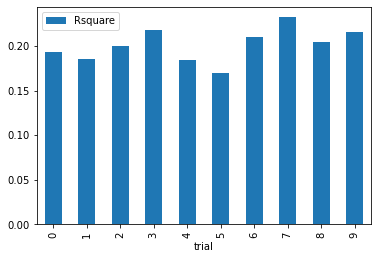

In [210]:
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    print('Trial {}, R-squared: {},  Slope: {}, Intercept: {},  '.format(i, metrics.r2_score(Y_test, Y_pred), \
                                                                      model.coef_, model.intercept_))

    
rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf.plot.bar(x='trial', y='Rsquare')

In [211]:
print(rdf['Rsquare'].mean())

0.2013055946055423


#### This model also passes 10-fold cross validation because all the R-square values are in the same range.

### Part 2: Build a Logistic Regression model using the affairs data from
https://www.statsmodels.org/dev/datasets/generated/fair.html

The goal of this part of the HW is to see if one can predict
whether a woman on given certain attributeds, such as age, years married, number of children etc, will particpate
in an affair or not


#### DataSet Description

From the [Statsmodels website](http://statsmodels.sourceforge.net/stable/datasets/generated/fair.html) we have the following information about the data:

Number of observations: 6366
Number of variables: 9
Variable name definitions:

    rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                    4 = good, 5 = very good
    age             : Age
    yrs_married     : No. years married. Interval approximations. See
                    original paper for detailed explanation.
    children        : No. children
    religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                    4 = strongly
    educ            : Level of education, 9 = grade school, 12 = high
                    school, 14 = some college, 16 = college graduate,
                    17 = some graduate school, 20 = advanced degree
    occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                    or unskilled worker; 3 = white-colloar; 4 = teacher
                    counselor social worker, nurse; artist, writers;
                    technician, skilled worker, 5 = managerial,
                    administrative, business, 6 = professional with
                    advanced degree
    occupation_husb : Husband's occupation. Same as occupation.
    affairs         : measure of time spent in extramarital affairs

See the original paper for more details.

In [213]:
# Load the dataset
df = pd.read_csv("affairs2.csv")
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,occ2,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,occ3,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,occ3,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,occ5,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,occ3,4.0,4.666666


Now, create a new column called 'had_affair'. We will set this column equal to 0 if the affairs column is 0 (meaning no time spent in affairs) otherwise the 'Had_Affair' value will be set as 1, indicating that the woman had an affair.

In [214]:
# has_affair
def has_affair(x):
    if x != 0:
        return 1
    else:
        return 0

# Apply to DataFrame
df['had_affair'] = df['affairs'].apply(has_affair)

In [215]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,had_affair
0,3.0,32.0,9.0,3.0,3.0,17.0,occ2,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,occ3,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,occ3,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,occ5,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,occ3,4.0,4.666666,1


In [216]:
df.tail()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,had_affair
6466,5.0,32.0,13.0,2.0,3.0,17.0,occ4,3.0,0.0,0
6467,4.0,32.0,13.0,1.0,1.0,16.0,occ5,5.0,0.0,0
6468,5.0,22.0,2.5,0.0,2.0,14.0,occ3,1.0,0.0,0
6469,5.0,32.0,6.0,1.0,3.0,14.0,occ3,4.0,0.0,0
6470,4.0,22.0,2.5,0.0,2.0,16.0,occ2,4.0,0.0,0


In [217]:
# Now we can drop the original affairs variable
df.drop(['affairs'], inplace=True, axis=1)

In [218]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,had_affair
0,3.0,32.0,9.0,3.0,3.0,17.0,occ2,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,occ3,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,occ3,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,occ5,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,occ3,4.0,1


### let's group by has or no affairs rows

In [219]:
df.groupby('had_affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation_husb
had_affair,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.833758
1,3.619555,30.537019,10.770389,1.686515,2.290547,13.876274,3.796108


So, one can see older woman who has married longer will have higher chance of having an affairs

We can also use Factorplot to see the effect from age

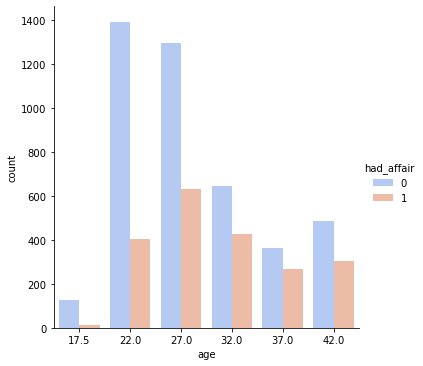

In [220]:
# Use Factorplot for age
sns.factorplot('age', kind='count', hue='had_affair', data=df,palette='coolwarm')

By looking at the ratio between the has_affair=1 versus has_affair=0, one can see that the older the woman, the higher the probability of having an affair

***Follow the standard proper way of building a model and in particular,***

1. Use the season heatmap to find if there are missing values. You can just drop those rows if there are not too many of them
2. Use the factorplot to comment on whether number of children and number of years of marriage is important or not
3. Build Logistic Regression model with all the numerical variables.
4. Print out the model performance metrics (precision/recall)
5. Do a countplot on the categorical variables
6. Call the get_dummies method to create the dummies variables for the categorical variables
7. Build another Logistic Regression model that include these dummies variabes.
8. Comment on your results based on the performance metrics

***Part 2: Type your code and answers here***

<AxesSubplot:>

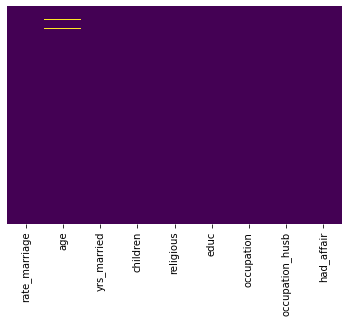

In [222]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [223]:
df.age.unique()

array([32. , 27. , 22. , 37. ,  nan, 42. , 17.5])

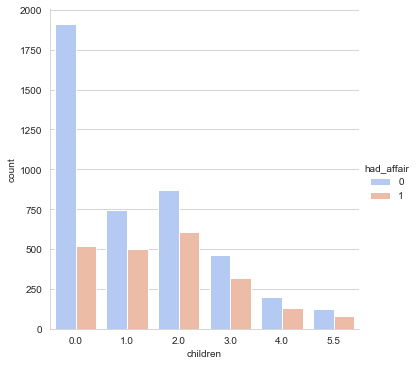

In [229]:
# Use Factorplot for children
sns.factorplot('children', kind='count', hue='had_affair', data=df,palette='coolwarm')

#### It appears the number of children is important, for whatever reason the more children you have the higher the ratio between women having an affair and not.

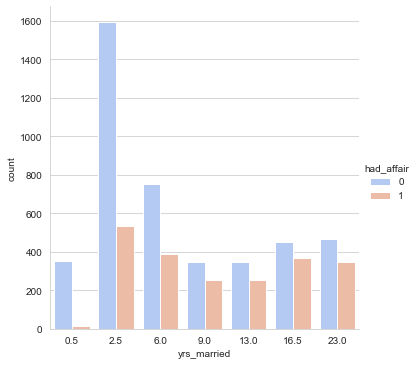

In [230]:
# Use Factorplot for yrs_married
sns.factorplot('yrs_married', kind='count', hue='had_affair', data=df,palette='coolwarm')

#### Years married does not look important, I cannot see any correlation.

In [259]:
def impute_age(cols):
    age = cols[0]
    if pd.isnull(age):
        return df['age'].mean()
    else:
        return age

In [260]:
df['age'] = df[['age']].apply(impute_age,axis=1)

<AxesSubplot:>

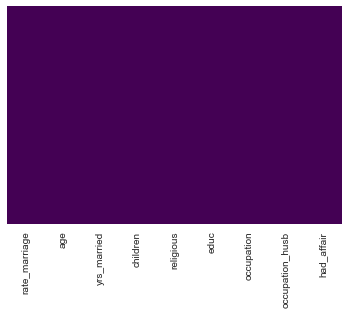

In [261]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [262]:
from sklearn.model_selection import train_test_split

In [263]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('occupation',axis=1), 
                                                    df['occupation'], test_size=0.20, 
                                                    random_state=101)

In [264]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [265]:
predictions = model.predict(X_test)

In [266]:
from sklearn.metrics import classification_report, accuracy_score

In [267]:
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

        occ1       0.00      0.00      0.00         8
        occ2       0.28      0.03      0.05       167
        occ3       0.53      0.79      0.64       572
        occ4       0.51      0.59      0.55       372
        occ5       0.00      0.00      0.00       154
        occ6       0.25      0.05      0.08        22

    accuracy                           0.52      1295
   macro avg       0.26      0.24      0.22      1295
weighted avg       0.42      0.52      0.45      1295

0.5227799227799228


<AxesSubplot:xlabel='occupation', ylabel='count'>

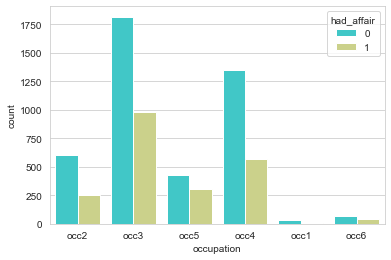

In [270]:
sns.set_style('whitegrid')
sns.countplot(x='occupation',hue='had_affair',data=df,palette='rainbow')

In [271]:
occupation = pd.get_dummies(df['occupation'],drop_first=True)

In [272]:
occupation

,occ2,occ3,occ4,occ5,occ6
0,1,0,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,1,0,0,0
...,...,...,...,...,...
6466,0,0,1,0,0
6467,0,0,0,1,0
6468,0,1,0,0,0
6469,0,1,0,0,0


In [273]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,had_affair
0,3.0,32.0,9.0,3.0,3.0,17.0,occ2,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,occ3,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,occ3,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,occ5,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,occ3,4.0,1


In [274]:
df = pd.concat([df, occupation], axis=1)
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,had_affair,occ2,occ3,occ4,occ5,occ6
0,3.0,32.0,9.0,3.0,3.0,17.0,occ2,5.0,1,1,0,0,0,0
1,3.0,27.0,13.0,3.0,1.0,14.0,occ3,4.0,1,0,1,0,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,occ3,5.0,1,0,1,0,0,0
3,4.0,37.0,16.5,4.0,3.0,16.0,occ5,5.0,1,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,occ3,4.0,1,0,1,0,0,0


In [275]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('occupation',axis=1), 
                                                    df['occupation'], test_size=0.30, 
                                                    random_state=101)
model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

        occ1       1.00      0.71      0.83        14
        occ2       0.99      1.00      1.00       252
        occ3       1.00      1.00      1.00       872
        occ4       1.00      1.00      1.00       536
        occ5       1.00      1.00      1.00       236
        occ6       0.97      1.00      0.98        32

    accuracy                           1.00      1942
   macro avg       0.99      0.95      0.97      1942
weighted avg       1.00      1.00      1.00      1942

0.9979402677651905


### We have increased our F-1 Score from 8% to 98%, Nice :)